# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + 'q=' + city + '&appid=' + weather_api_key + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | nalut
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | caleta de carquin
Processing Record 6 of Set 1 | hovd
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | marrakesh
Processing Record 10 of Set 1 | kingston
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | midvagur
Processing Record 13 of Set 1 | el porvenir
Processing Record 14 of Set 1 | heyuan
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | moanda
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | tabou
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | hawaiian paradise park


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64


In [21]:
# Display sample data
print(city_data_df.head())

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0             albany  42.6001  -73.9662      5.32        51          25   
1          adamstown -25.0660 -130.1015     24.78        81           1   
2              nalut  30.3333   10.8500     23.87        14           1   
3          papatowai -46.5619  169.4708     12.25        89         100   
4  caleta de carquin -11.0925  -77.6267     21.83        81          97   

   Wind Speed Country        Date  
0        3.13      US  1743521024  
1        3.53      PN  1743521026  
2        9.52      LY  1743521028  
3        4.63      NZ  1743521029  
4        3.37      PE  1743521031  


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.32,51,25,3.13,US,1743521024
1,adamstown,-25.0660,-130.1015,24.78,81,1,3.53,PN,1743521026
2,nalut,30.3333,10.8500,23.87,14,1,9.52,LY,1743521028
3,papatowai,-46.5619,169.4708,12.25,89,100,4.63,NZ,1743521029
4,caleta de carquin,-11.0925,-77.6267,21.83,81,97,3.37,PE,1743521031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

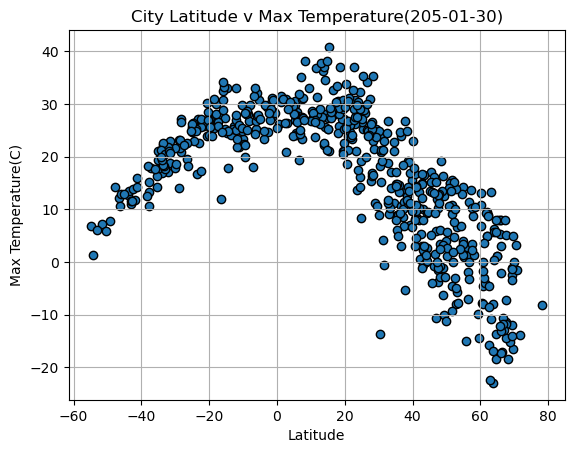

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='o',edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Latitude v Max Temperature(205-01-30)')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

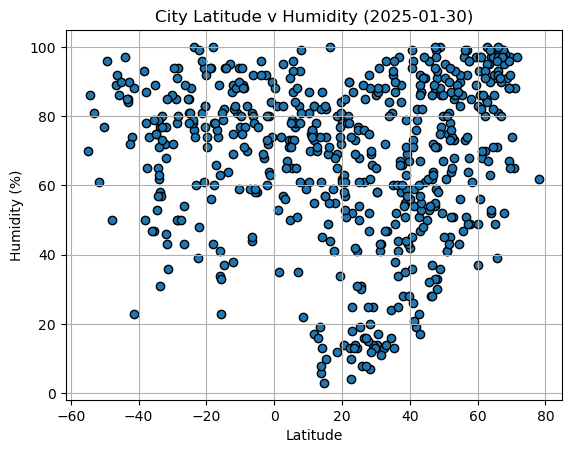

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude v Humidity (2025-01-30)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

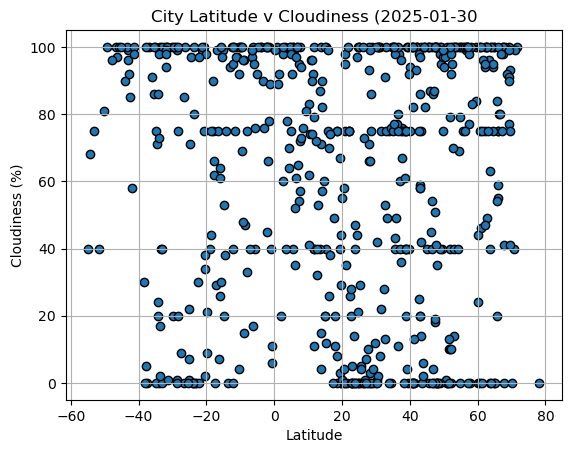

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude v Cloudiness (2025-01-30')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

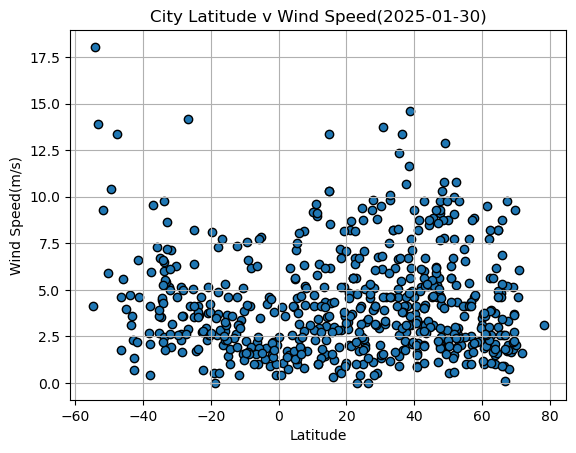

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude v Wind Speed(2025-01-30)')
plt.ylabel('Wind Speed(m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    
    y_axis = list(map((lambda x_valus: slope * x_valus + intercept), x))

    plt.plot(x, y_axis, color= 'red')

    equation = f"y={slope:.2f}x + {intercept:.2f}"
    plt.text(min(x),min(y), equation, fontsize= 15, color='red', verticalalignment='top')

    print(f'The r^2 value is: {np.square(r)}')

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.32,51,25,3.13,US,1743521024
2,nalut,30.3333,10.8500,23.87,14,1,9.52,LY,1743521028
5,hovd,48.0056,91.6419,3.47,30,0,4.19,MN,1743520891
7,vila franca do campo,37.7167,-25.4333,13.23,66,76,10.68,PT,1743521034
8,marrakesh,31.6315,-8.0083,23.04,43,75,4.63,MA,1743520873


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,24.78,81,1,3.53,PN,1743521026
3,papatowai,-46.5619,169.4708,12.25,89,100,4.63,NZ,1743521029
4,caleta de carquin,-11.0925,-77.6267,21.83,81,97,3.37,PE,1743521031
6,port elizabeth,-33.9180,25.5701,20.73,79,0,9.77,ZA,1743520740
10,port-aux-francais,-49.3500,70.2167,7.71,96,100,10.39,TF,1743521038


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7087931011567263


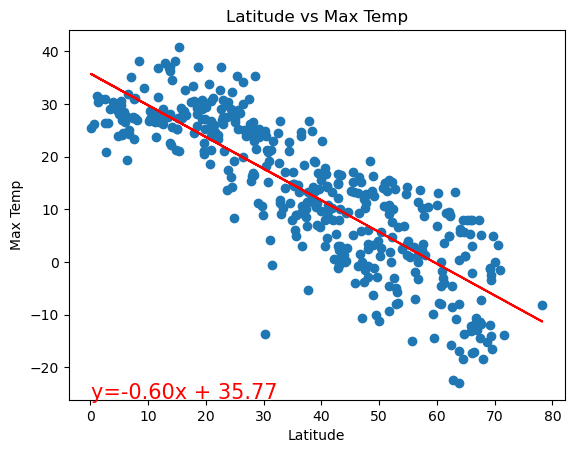

In [77]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.6692789754779679


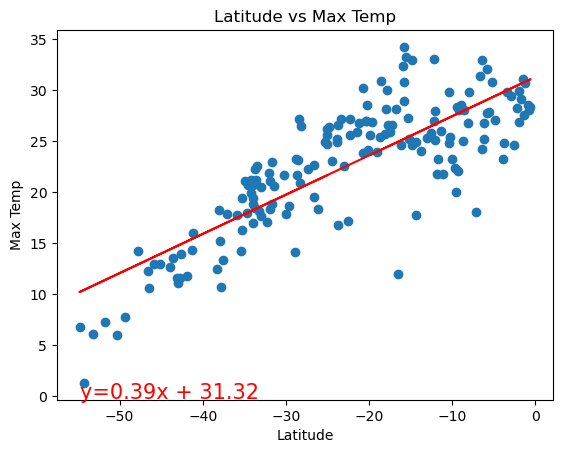

In [85]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


* In my analysis, the relationship between latitude and humidity is weak in both hemispheres. In the Northern Hemisphere, the regression equation y=0.48x+53.35 with an r^2 value of 0.16 suggests a slight positive correlation, meaning humidity tends to increase with latitude, but the low, but the low r^2 indicates a weak relationship.

* Similarly, in the Southern Hemisphere, the equation y=0.51x+85.06 with an r^2 of 0.14 also shows a weak positive correlation. The low r^2 values in both cases suggest that latitude alone is not a strong predictor of humidity.


### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.07035372463481673


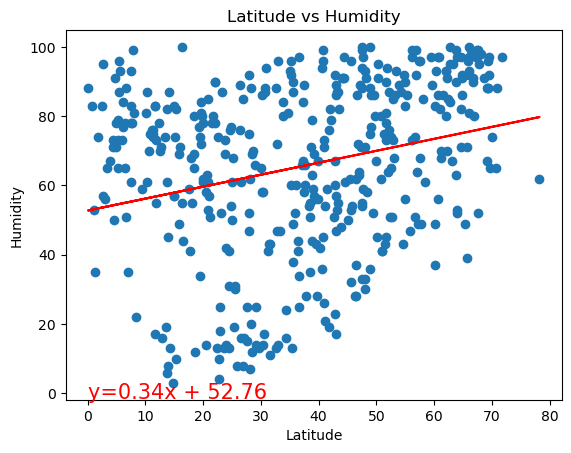

In [87]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.00025880513138167054


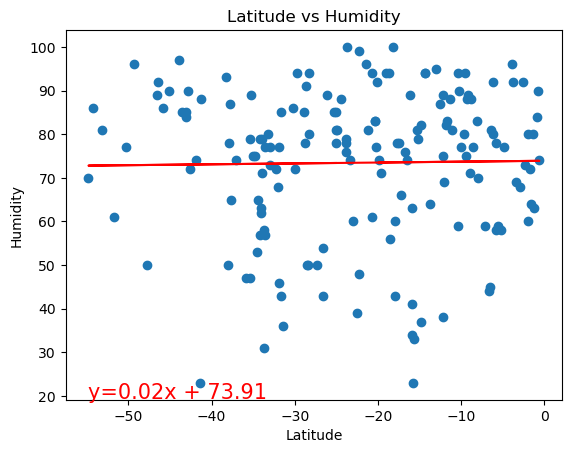

In [89]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.006486991982033384


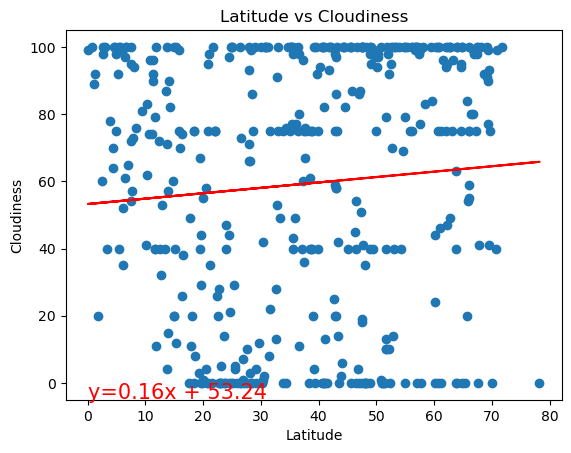

In [91]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 3.4512031764370273e-06


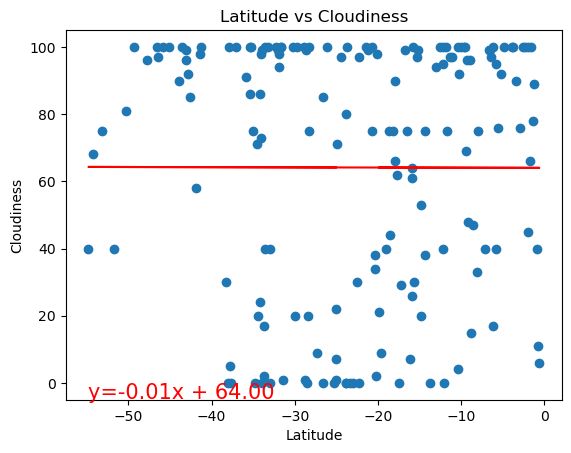

In [93]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE



* The relationship between latitude and cloudiness is weak in both hemispheres. In the Northern Hemisphere, the regression equation y=0.73x+29.72 with an r^2 of 0.12 suggests a slight increase in cloudiness with latitude, but the low r^2 indicates a weak correlation.

* Similarly, in the Southern Hemisphere, the equation y=0.99x+79.33 with an r^2of 0.12 also shows a weak positive correlation. The low r^2 values in both cases suggest that latitude alone does not strongly determine cloudiness, as other factors like regional weather patterns and proximity to oceans likely have a greater impact.


### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 8.693708492196675e-05


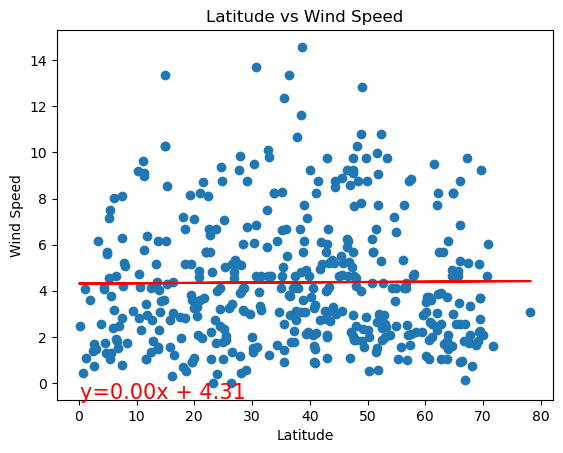

In [95]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.16455944977371764


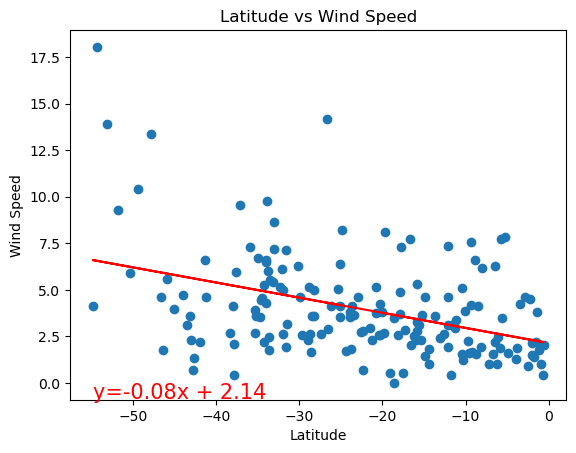

In [97]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

* the relationship between latitude and wind speed is very weak in both hemispheres. In the Northern Hemisphere, the regression equation y=−0.01x+4.39 with an r^2 of 0.008 shows almost no correlation, indicating that latitude has little to no impact on wind speed.
* In the Southern Hemisphere, the equation y=−0.08x+2.39 with an r^2 of 0.116 suggests a slightly stronger but still weak negative correlation. The low R^2 values in both cases indicate that factors other than latitude, such as pressure systems, storms, topography, and oceanic influences rather than latitude alone.